# Classify Irises

In this laboration we will try to build a neural net to identify what type of Iris a flower is. We will also evaluate the Artificial Neural Net by comparing it to other methods.

The dataset is a classical dataset in machinelearning collected in 1936 by Edgar Anderson and first published by Ronald Fisher. By measuring the sepal width, sepal length, petal width and petal length Fisher tried to specify differences between the spicies.

This is a simple example and often used when teaching ML algorithms. Since it contains of a reasonable amount of parameters it is easy to understand the data. It is also very good in the sense that there are some overlaps that might be very hard to detect accuratly. It therefor illustrates the complexity of building an AI that that has a accuracy of 100%.


![alt text](https://cdn-images-1.medium.com/max/2560/1*7bnLKsChXq94QjtAiRn40w.png "Three types of Irises the we want to classify.")

As you see those flowers are quite similar. Compared to a botanist the NN might not be perfect. But compared to someone who tries to identify the flower based on a flower book it might be quite accurate. Let's see how to do it.

In [2]:
# First we load all libraries needed for this notebook
 
import pandas as pd # Load the Pandas libraries with alias 'pd'
import tensorflow as tf # A library developed by google making GPU calculations simple
import seaborn as sns # A nice library for plotting, alternative to matplotlib

from sklearn.preprocessing import normalize #
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from matplotlib import pyplot as plt

In [3]:
# Read data from file iris.csv' from the data folder
# Open the csv to see the data
data = pd.read_csv("./data/iris.csv") 
# Preview the last 10 lines of the loaded data 
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Explore the data
Before starting to do any modifications of the data or attempts to build some kind of AI/ML model. We must understand the data. This explorative phase is very important in order to succesful build a model. 

One method in the pandas.DataFrame class is the `describe` method which shows some statistical information about each column.

In [4]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


c:\users\sjohanss\docume~1\utbild~1\rergio~1\venv\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


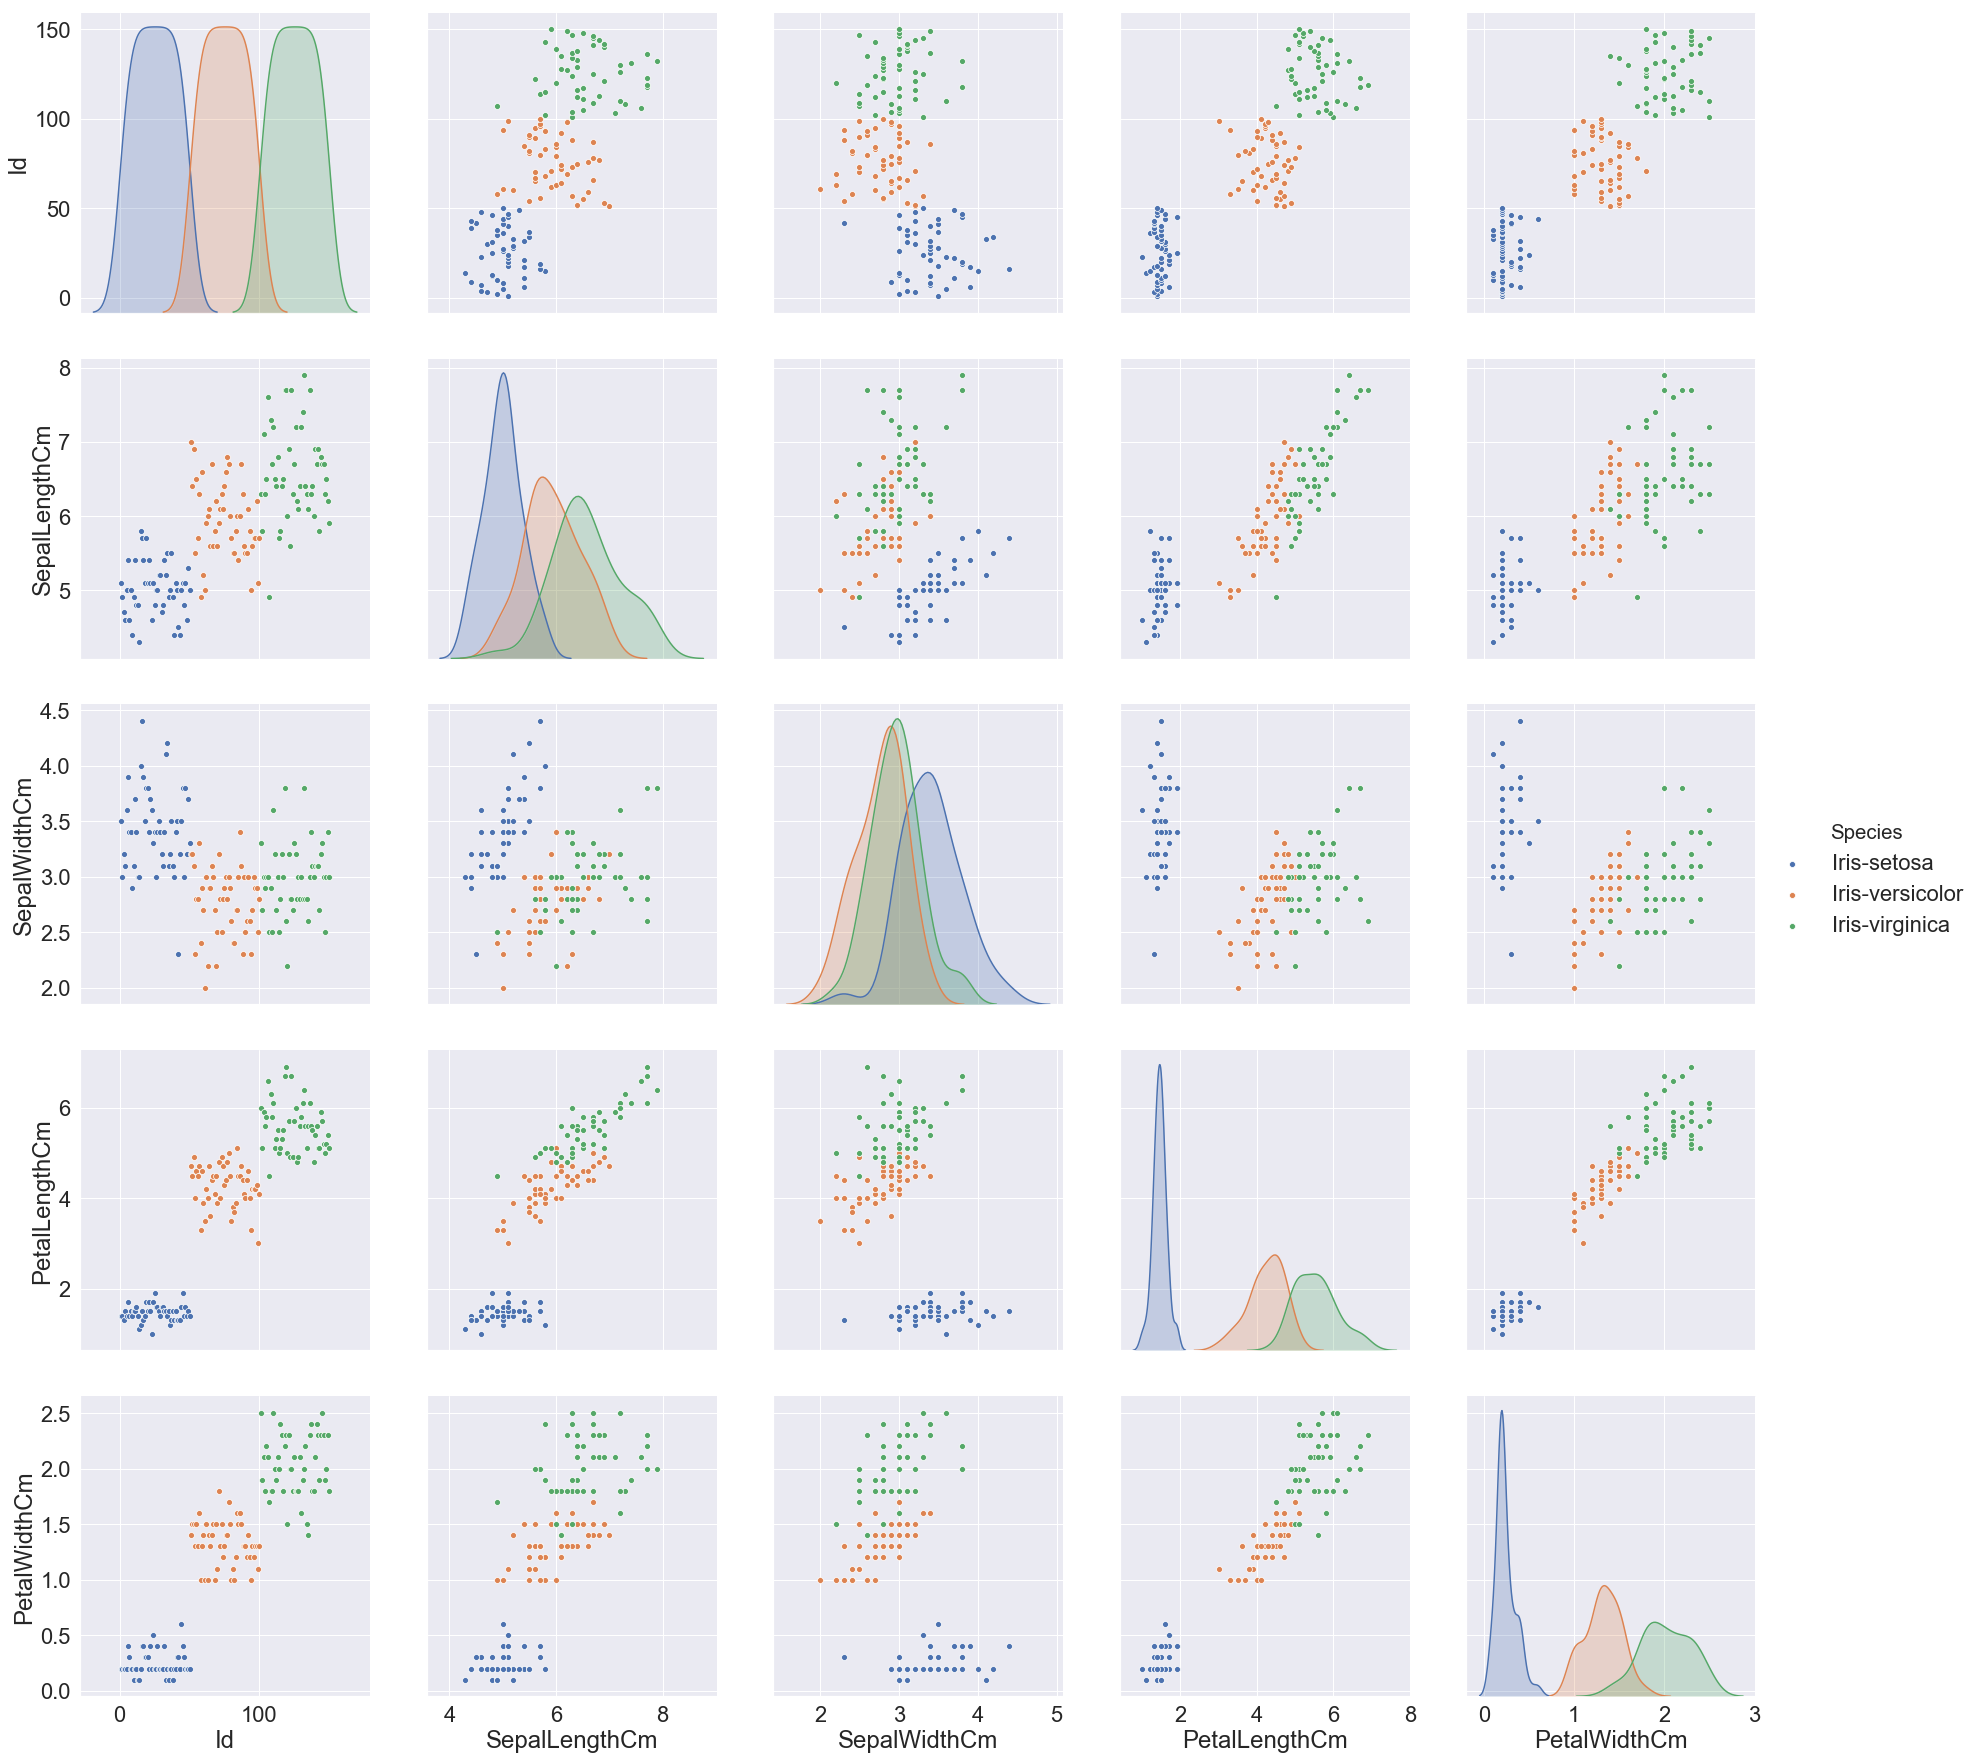

In [5]:
cols=data.columns
sns.set(font_scale=2)
sns.pairplot(vars=cols[:-1], data=data, hue='Species', size=5)
plt.show()

### Delete data
By reading the data we can se that the parameter "Id" has a very strong correlation with the type of Iris. This is a pure artificial correlation existing only because of the structure of the data. Where all Iris-Setosa are in the beginning of the dataset.

Id should therefor be deleted. One way to do this is with the `pop` method included in the dataframe class.


In [6]:
#data.pop('Unnamed: 32')
try:
    data.pop('Id')
except:
    print('Id already deleted')
data.head(n=10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


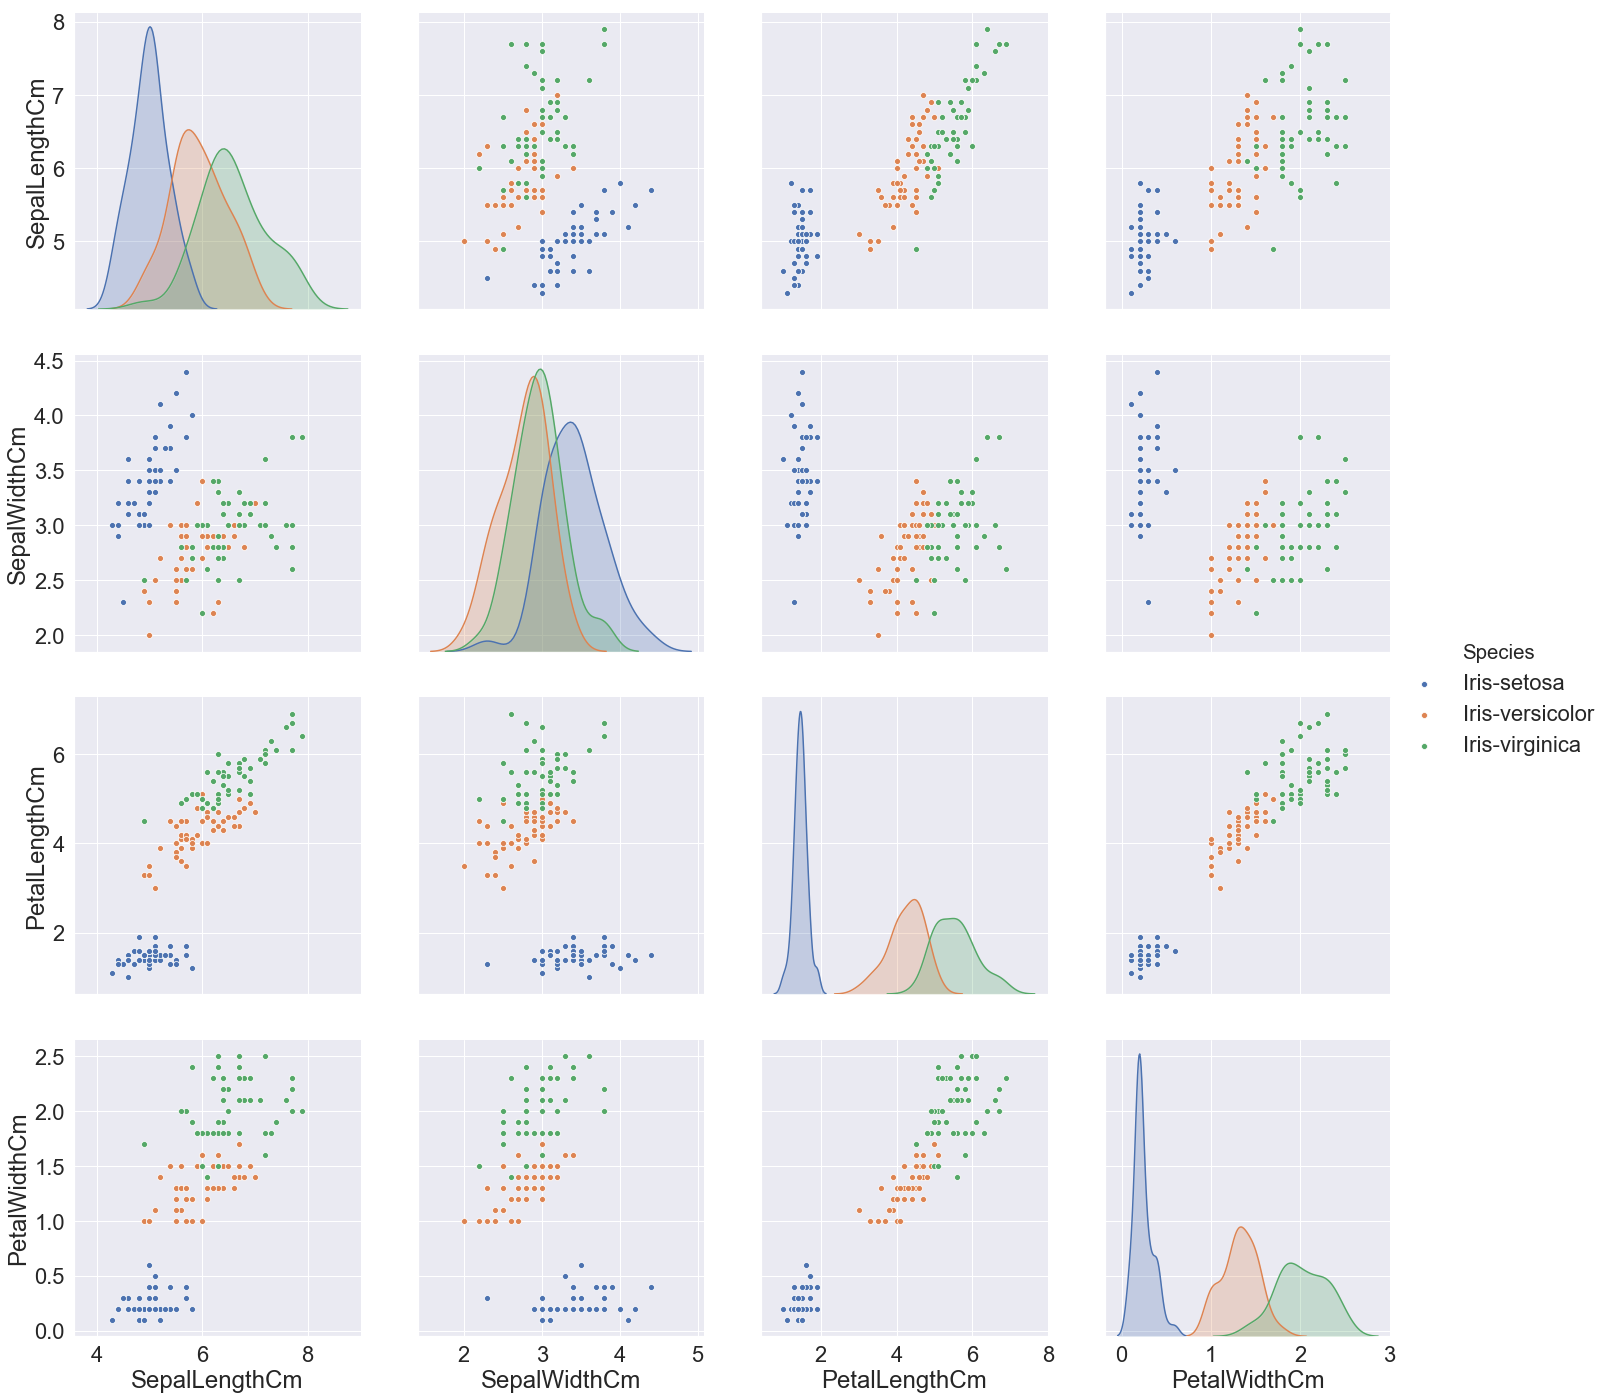

In [7]:
sns.pairplot(vars=cols[1:-1], data=data, hue='Species', size=5)
plt.show()

# Correlation of data
One method to analyze how well one variable describes another variable is by correlations.

$\rho(x,y)=\frac{\sum\limits_{i=1}^n(x_i-\bar{x})(y_i-\bar{y})}{\sum\limits_{i=1}^n(x_i-\bar{x})^2\sum\limits_{i=1}^n(y_i-\bar{y})^2}$

The correlation is a method included in the dataframe `corr`. 

In [8]:
# Write the syntax here:
corr = data.corr()
corr

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


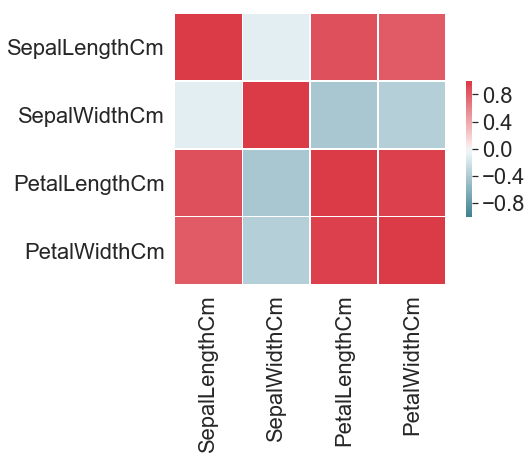

In [9]:
import numpy as np
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(7, 5))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=1,vmin=-1, center=0,# mask=mask,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

From the the figure and table aboove we can see that two of the variables are well correlated. That means it is quite likely that two of the well correlated variables could be deleted without impacting the accuracy of the model.


In [10]:
# Shuffle the data each time 
data = data.sample(frac=1).reset_index(drop=True)

# Split the data into 
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values
X_normalized = normalize(X,axis=0)

total_length = len(data)
train_length = int(0.8*total_length)
test_length = int(0.2*total_length)

X_train = X_normalized[:train_length]
X_test = X_normalized[train_length:]
y_train = y[:train_length]
y_test = y[train_length:]

le = preprocessing.LabelEncoder()
le.fit(y_train)
train_label = le.transform(y_train)
y_train = tf.keras.utils.to_categorical(train_label,num_classes=3)

le2 = preprocessing.LabelEncoder()
le2.fit(y_test)
test_label = le2.transform(y_test)
y_test=tf.keras.utils.to_categorical(test_label,num_classes=3)

model=tf.keras.Sequential()
model.add(tf.keras.layers.Dense(200,input_dim=4,activation='relu'))
model.add(tf.keras.layers.Dense(100,activation='relu'))
model.add(tf.keras.layers.Dense(3,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=20,epochs=300,verbose=1)


Train on 120 samples, validate on 30 samples
Epoch 1/300
120/120 [==============================] - 0s 2ms/sample - loss: 1.0950 - acc: 0.3417 - val_loss: 1.0884 - val_acc: 0.2667
Epoch 2/300
120/120 [==============================] - 0s 83us/sample - loss: 1.0777 - acc: 0.6583 - val_loss: 1.0763 - val_acc: 0.7667
Epoch 3/300
120/120 [==============================] - 0s 80us/sample - loss: 1.0650 - acc: 0.6583 - val_loss: 1.0623 - val_acc: 0.7333
Epoch 4/300
120/120 [==============================] - 0s 108us/sample - loss: 1.0508 - acc: 0.6500 - val_loss: 1.0506 - val_acc: 0.7333
Epoch 5/300
120/120 [==============================] - 0s 116us/sample - loss: 1.0334 - acc: 0.6500 - val_loss: 1.0304 - val_acc: 0.7333
Epoch 6/300
120/120 [==============================] - 0s 106us/sample - loss: 1.0112 - acc: 0.6500 - val_loss: 1.0032 - val_acc: 0.7333
Epoch 7/300
120/120 [==============================] - 0s 125us/sample - loss: 0.9855 - acc: 0.6500 - val_loss: 0.9635 - val_acc: 0.7333


Epoch 60/300
120/120 [==============================] - 0s 100us/sample - loss: 0.0994 - acc: 0.9667 - val_loss: 0.0958 - val_acc: 0.9667
Epoch 61/300
120/120 [==============================] - 0s 83us/sample - loss: 0.1081 - acc: 0.9500 - val_loss: 0.1233 - val_acc: 0.9333
Epoch 62/300
120/120 [==============================] - 0s 91us/sample - loss: 0.1000 - acc: 0.9583 - val_loss: 0.0869 - val_acc: 1.0000
Epoch 63/300
120/120 [==============================] - 0s 103us/sample - loss: 0.0961 - acc: 0.9667 - val_loss: 0.1076 - val_acc: 0.9333
Epoch 64/300
120/120 [==============================] - 0s 100us/sample - loss: 0.0912 - acc: 0.9583 - val_loss: 0.0954 - val_acc: 0.9333
Epoch 65/300
120/120 [==============================] - 0s 102us/sample - loss: 0.0886 - acc: 0.9583 - val_loss: 0.0885 - val_acc: 0.9667
Epoch 66/300
120/120 [==============================] - 0s 83us/sample - loss: 0.0884 - acc: 0.9583 - val_loss: 0.0922 - val_acc: 0.9333
Epoch 67/300
120/120 [===============

120/120 [==============================] - 0s 83us/sample - loss: 0.0666 - acc: 0.9667 - val_loss: 0.0707 - val_acc: 0.9333
Epoch 120/300
120/120 [==============================] - 0s 83us/sample - loss: 0.0732 - acc: 0.9667 - val_loss: 0.0620 - val_acc: 0.9667
Epoch 121/300
120/120 [==============================] - 0s 100us/sample - loss: 0.0762 - acc: 0.9667 - val_loss: 0.0866 - val_acc: 0.9333
Epoch 122/300
120/120 [==============================] - 0s 100us/sample - loss: 0.0700 - acc: 0.9667 - val_loss: 0.0554 - val_acc: 1.0000
Epoch 123/300
120/120 [==============================] - 0s 112us/sample - loss: 0.0679 - acc: 0.9667 - val_loss: 0.0797 - val_acc: 0.9333
Epoch 124/300
120/120 [==============================] - 0s 96us/sample - loss: 0.0652 - acc: 0.9667 - val_loss: 0.0864 - val_acc: 0.9333
Epoch 125/300
120/120 [==============================] - 0s 91us/sample - loss: 0.0693 - acc: 0.9833 - val_loss: 0.0802 - val_acc: 0.9333
Epoch 126/300
120/120 [======================

120/120 [==============================] - 0s 100us/sample - loss: 0.0650 - acc: 0.9667 - val_loss: 0.0938 - val_acc: 0.9333
Epoch 179/300
120/120 [==============================] - 0s 75us/sample - loss: 0.0695 - acc: 0.9833 - val_loss: 0.0810 - val_acc: 0.9333
Epoch 180/300
120/120 [==============================] - 0s 83us/sample - loss: 0.0601 - acc: 0.9667 - val_loss: 0.0421 - val_acc: 1.0000
Epoch 181/300
120/120 [==============================] - 0s 108us/sample - loss: 0.0711 - acc: 0.9583 - val_loss: 0.0597 - val_acc: 0.9667
Epoch 182/300
120/120 [==============================] - 0s 83us/sample - loss: 0.0592 - acc: 0.9750 - val_loss: 0.0976 - val_acc: 0.9333
Epoch 183/300
120/120 [==============================] - 0s 91us/sample - loss: 0.0700 - acc: 0.9750 - val_loss: 0.0870 - val_acc: 0.9333
Epoch 184/300
120/120 [==============================] - 0s 91us/sample - loss: 0.0759 - acc: 0.9750 - val_loss: 0.0388 - val_acc: 1.0000
Epoch 185/300
120/120 [=======================

120/120 [==============================] - 0s 108us/sample - loss: 0.0620 - acc: 0.9750 - val_loss: 0.0791 - val_acc: 0.9333
Epoch 238/300
120/120 [==============================] - 0s 108us/sample - loss: 0.0599 - acc: 0.9833 - val_loss: 0.1051 - val_acc: 0.9333
Epoch 239/300
120/120 [==============================] - 0s 91us/sample - loss: 0.0598 - acc: 0.9667 - val_loss: 0.0640 - val_acc: 0.9333
Epoch 240/300
120/120 [==============================] - 0s 83us/sample - loss: 0.0609 - acc: 0.9667 - val_loss: 0.0460 - val_acc: 1.0000
Epoch 241/300
120/120 [==============================] - 0s 83us/sample - loss: 0.0601 - acc: 0.9583 - val_loss: 0.0731 - val_acc: 0.9333
Epoch 242/300
120/120 [==============================] - ETA: 0s - loss: 0.0075 - acc: 1.000 - 0s 100us/sample - loss: 0.0640 - acc: 0.9667 - val_loss: 0.0481 - val_acc: 1.0000
Epoch 243/300
120/120 [==============================] - 0s 100us/sample - loss: 0.0575 - acc: 0.9667 - val_loss: 0.0710 - val_acc: 0.9333
Epoch 

Epoch 296/300
120/120 [==============================] - 0s 96us/sample - loss: 0.0603 - acc: 0.9833 - val_loss: 0.0825 - val_acc: 0.9333
Epoch 297/300
120/120 [==============================] - 0s 100us/sample - loss: 0.0558 - acc: 0.9750 - val_loss: 0.0375 - val_acc: 1.0000
Epoch 298/300
120/120 [==============================] - 0s 75us/sample - loss: 0.0598 - acc: 0.9667 - val_loss: 0.0568 - val_acc: 0.9667
Epoch 299/300
120/120 [==============================] - 0s 100us/sample - loss: 0.0561 - acc: 0.9667 - val_loss: 0.0733 - val_acc: 0.9333
Epoch 300/300
120/120 [==============================] - 0s 100us/sample - loss: 0.0582 - acc: 0.9667 - val_loss: 0.0638 - val_acc: 0.9333


#### Validate results
By looking output from the model fit. We can se that the accuracy of training data keeps raising throuout the process of finding constants for each neuron in the net. However looking att the accuracy of the validation set there is some kind of maximum after quite few iteration. 

We can for a reasonable high amount epochs by plotting the history of the accuracy and loss. What is a reasonable amount of epochs?

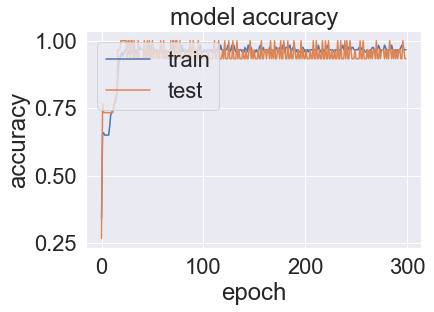

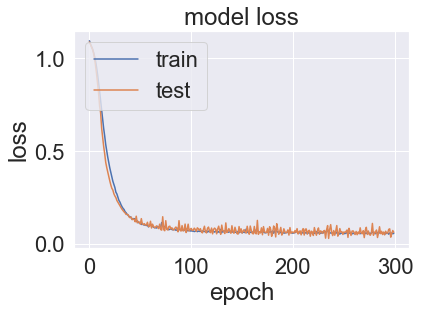

In [11]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

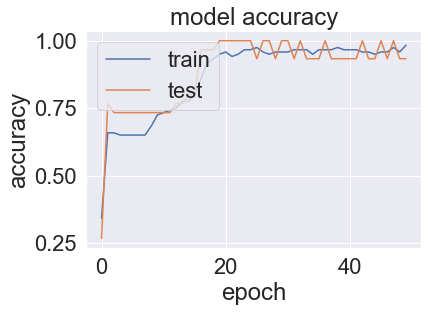

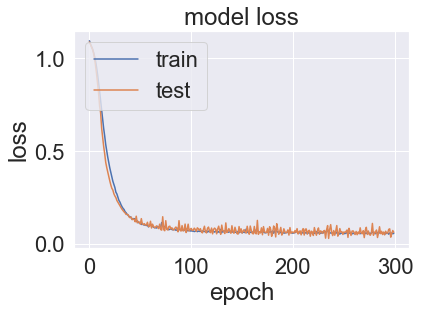

In [12]:
# summarize history for accuracy
plt.plot(history.history['acc'][0:50])
plt.plot(history.history['val_acc'][0:50])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Better net?
In the example above there are quite a lot of neurons in each layer of the net. What happens if we follow the rule of thumb and use somewhere between the amount of outputs classes and number of input variables in each layer? 

Do we see any diffrence in the loss and accuracy? 

In [13]:
# Shuffle the data each time 
data = data.sample(frac=1).reset_index(drop=True)

# Split the data into 
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values
X_normalized = normalize(X,axis=0)

total_length = len(data)
train_length = int(0.7*total_length)
test_length = int(0.15*total_length)
valid_length = int(0.15*total_length)

X_train = X_normalized[:train_length]
X_test = X_normalized[train_length:]
y_train = y[:train_length]
y_test = y[train_length:]

le = preprocessing.LabelEncoder()
le.fit(y_train)
train_label = le.transform(y_train)
y_train = tf.keras.utils.to_categorical(train_label,num_classes=3)

le2 = preprocessing.LabelEncoder()
le2.fit(y_test)
test_label = le2.transform(y_test)
y_test=tf.keras.utils.to_categorical(test_label,num_classes=3)

model=tf.keras.Sequential()
model.add(tf.keras.layers.Dense(4,input_dim=4,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
#model.add(tf.keras.layers.Dense(6,activation='relu'))
#model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(3,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=20,epochs=300,verbose=1)


Train on 105 samples, validate on 45 samples
Epoch 1/300
105/105 [==============================] - 0s 2ms/sample - loss: 1.1014 - acc: 0.3333 - val_loss: 1.1076 - val_acc: 0.2889
Epoch 2/300
105/105 [==============================] - 0s 114us/sample - loss: 1.0971 - acc: 0.3714 - val_loss: 1.1079 - val_acc: 0.2889
Epoch 3/300
105/105 [==============================] - 0s 95us/sample - loss: 1.0983 - acc: 0.3810 - val_loss: 1.1073 - val_acc: 0.2889
Epoch 4/300
105/105 [==============================] - 0s 128us/sample - loss: 1.1037 - acc: 0.3524 - val_loss: 1.1070 - val_acc: 0.2889
Epoch 5/300
105/105 [==============================] - 0s 125us/sample - loss: 1.0984 - acc: 0.3714 - val_loss: 1.1071 - val_acc: 0.2889
Epoch 6/300
105/105 [==============================] - 0s 133us/sample - loss: 1.0984 - acc: 0.3714 - val_loss: 1.1069 - val_acc: 0.2889
Epoch 7/300
105/105 [==============================] - 0s 114us/sample - loss: 1.1003 - acc: 0.3238 - val_loss: 1.1062 - val_acc: 0.2889

105/105 [==============================] - 0s 123us/sample - loss: 1.0706 - acc: 0.4667 - val_loss: 1.0807 - val_acc: 0.2889
Epoch 61/300
105/105 [==============================] - 0s 138us/sample - loss: 1.0756 - acc: 0.3429 - val_loss: 1.0801 - val_acc: 0.3111
Epoch 62/300
105/105 [==============================] - 0s 133us/sample - loss: 1.0635 - acc: 0.5048 - val_loss: 1.0787 - val_acc: 0.3111
Epoch 63/300
105/105 [==============================] - 0s 133us/sample - loss: 1.0751 - acc: 0.4381 - val_loss: 1.0777 - val_acc: 0.3111
Epoch 64/300
105/105 [==============================] - 0s 114us/sample - loss: 1.0692 - acc: 0.4190 - val_loss: 1.0774 - val_acc: 0.3778
Epoch 65/300
105/105 [==============================] - 0s 133us/sample - loss: 1.0672 - acc: 0.4381 - val_loss: 1.0771 - val_acc: 0.3778
Epoch 66/300
105/105 [==============================] - 0s 114us/sample - loss: 1.0668 - acc: 0.4286 - val_loss: 1.0763 - val_acc: 0.3778
Epoch 67/300
105/105 [=========================

105/105 [==============================] - 0s 121us/sample - loss: 1.0098 - acc: 0.7524 - val_loss: 1.0095 - val_acc: 0.8889
Epoch 120/300
105/105 [==============================] - 0s 161us/sample - loss: 1.0176 - acc: 0.7524 - val_loss: 1.0076 - val_acc: 0.9111
Epoch 121/300
105/105 [==============================] - ETA: 0s - loss: 1.0013 - acc: 0.800 - 0s 123us/sample - loss: 1.0101 - acc: 0.7619 - val_loss: 1.0062 - val_acc: 0.9111
Epoch 122/300
105/105 [==============================] - 0s 142us/sample - loss: 0.9939 - acc: 0.8095 - val_loss: 1.0055 - val_acc: 0.8667
Epoch 123/300
105/105 [==============================] - 0s 114us/sample - loss: 1.0046 - acc: 0.7810 - val_loss: 1.0048 - val_acc: 0.8222
Epoch 124/300
105/105 [==============================] - 0s 123us/sample - loss: 1.0012 - acc: 0.7810 - val_loss: 1.0035 - val_acc: 0.8000
Epoch 125/300
105/105 [==============================] - 0s 133us/sample - loss: 0.9968 - acc: 0.7810 - val_loss: 1.0017 - val_acc: 0.8444
Epo

Epoch 178/300
105/105 [==============================] - 0s 123us/sample - loss: 0.9246 - acc: 0.6857 - val_loss: 0.9161 - val_acc: 0.9556
Epoch 179/300
105/105 [==============================] - 0s 109us/sample - loss: 0.9125 - acc: 0.7048 - val_loss: 0.9149 - val_acc: 0.9556
Epoch 180/300
105/105 [==============================] - 0s 123us/sample - loss: 0.9266 - acc: 0.7143 - val_loss: 0.9139 - val_acc: 0.9778
Epoch 181/300
105/105 [==============================] - 0s 104us/sample - loss: 0.9121 - acc: 0.7619 - val_loss: 0.9133 - val_acc: 1.0000
Epoch 182/300
105/105 [==============================] - 0s 104us/sample - loss: 0.9215 - acc: 0.7524 - val_loss: 0.9130 - val_acc: 0.9778
Epoch 183/300
105/105 [==============================] - 0s 85us/sample - loss: 0.9162 - acc: 0.7524 - val_loss: 0.9117 - val_acc: 0.9778
Epoch 184/300
105/105 [==============================] - 0s 114us/sample - loss: 0.9135 - acc: 0.7524 - val_loss: 0.9094 - val_acc: 0.9778
Epoch 185/300
105/105 [=====

105/105 [==============================] - 0s 109us/sample - loss: 0.8407 - acc: 0.6762 - val_loss: 0.8266 - val_acc: 0.9556
Epoch 238/300
105/105 [==============================] - 0s 104us/sample - loss: 0.8479 - acc: 0.6857 - val_loss: 0.8241 - val_acc: 0.9556
Epoch 239/300
105/105 [==============================] - 0s 92us/sample - loss: 0.8364 - acc: 0.6952 - val_loss: 0.8224 - val_acc: 0.9556
Epoch 240/300
105/105 [==============================] - 0s 95us/sample - loss: 0.8391 - acc: 0.6762 - val_loss: 0.8204 - val_acc: 0.9556
Epoch 241/300
105/105 [==============================] - 0s 114us/sample - loss: 0.8376 - acc: 0.6952 - val_loss: 0.8195 - val_acc: 0.9556
Epoch 242/300
105/105 [==============================] - 0s 95us/sample - loss: 0.8416 - acc: 0.7048 - val_loss: 0.8187 - val_acc: 0.9556
Epoch 243/300
105/105 [==============================] - 0s 85us/sample - loss: 0.8017 - acc: 0.7524 - val_loss: 0.8171 - val_acc: 0.9556
Epoch 244/300
105/105 [======================

Epoch 296/300
105/105 [==============================] - 0s 95us/sample - loss: 0.7751 - acc: 0.6857 - val_loss: 0.7453 - val_acc: 0.9556
Epoch 297/300
105/105 [==============================] - 0s 123us/sample - loss: 0.7562 - acc: 0.7619 - val_loss: 0.7437 - val_acc: 0.9556
Epoch 298/300
105/105 [==============================] - 0s 123us/sample - loss: 0.7848 - acc: 0.6952 - val_loss: 0.7426 - val_acc: 0.9556
Epoch 299/300
105/105 [==============================] - 0s 114us/sample - loss: 0.7634 - acc: 0.7333 - val_loss: 0.7420 - val_acc: 0.9556
Epoch 300/300
105/105 [==============================] - 0s 114us/sample - loss: 0.7754 - acc: 0.6571 - val_loss: 0.7410 - val_acc: 0.9556


In [14]:
# Normalize the data before splitting it train test and validation set.
data = data.sample(frac=1).reset_index(drop=True)
data.iloc[:,:-1] = normalize(data.iloc[:,:-1].values,axis=0)

train, validate, test = np.split(data.sample(frac=1), [int(.6*len(data)), int(.8*len(data))])

# Split the data into train test and validation sets.
train_x = train.iloc[:,:-1].values
train_y = train.iloc[:,-1].values

test_x = test.iloc[:,:-1].values
test_y = test.iloc[:,-1].values

validate_x = validate.iloc[:,:-1].values
validate_y = validate.iloc[:,-1].values

# Convert the label to a understandable format for tensorflow
le = preprocessing.LabelEncoder()
le.fit(train_y)

train_label = le.transform(train_y)
train_y = tf.keras.utils.to_categorical(train_label,num_classes=3)

test_label = le.transform(test_y)
test_y = tf.keras.utils.to_categorical(test_label,num_classes=3)

validate_label = le.transform(validate_y)
validate_y = tf.keras.utils.to_categorical(validate_label, num_classes=3)

In [15]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Dense(100,input_dim=4,activation='relu'))
#model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(60,activation='relu'))
#model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(3,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])
history = model.fit(train_x,train_y,validation_data=(validate_x, validate_y),batch_size=20,epochs=1500,verbose=1)


Train on 90 samples, validate on 30 samples
Epoch 1/1500
90/90 [==============================] - 0s 2ms/sample - loss: 1.0959 - acc: 0.3778 - val_loss: 1.0925 - val_acc: 0.2667
Epoch 2/1500
90/90 [==============================] - 0s 121us/sample - loss: 1.0862 - acc: 0.4444 - val_loss: 1.0852 - val_acc: 0.6667
Epoch 3/1500
90/90 [==============================] - 0s 111us/sample - loss: 1.0787 - acc: 0.7000 - val_loss: 1.0805 - val_acc: 0.7333
Epoch 4/1500
90/90 [==============================] - 0s 100us/sample - loss: 1.0725 - acc: 0.7444 - val_loss: 1.0756 - val_acc: 0.5667
Epoch 5/1500
90/90 [==============================] - 0s 111us/sample - loss: 1.0654 - acc: 0.7556 - val_loss: 1.0674 - val_acc: 0.7333
Epoch 6/1500
90/90 [==============================] - 0s 109us/sample - loss: 1.0573 - acc: 0.7667 - val_loss: 1.0616 - val_acc: 0.6000
Epoch 7/1500
90/90 [==============================] - 0s 122us/sample - loss: 1.0495 - acc: 0.7889 - val_loss: 1.0510 - val_acc: 0.8333
Epoch 

90/90 [==============================] - 0s 122us/sample - loss: 0.2108 - acc: 0.9778 - val_loss: 0.2542 - val_acc: 0.9000
Epoch 61/1500
90/90 [==============================] - 0s 111us/sample - loss: 0.2053 - acc: 0.9778 - val_loss: 0.2452 - val_acc: 0.9000
Epoch 62/1500
90/90 [==============================] - 0s 134us/sample - loss: 0.1991 - acc: 0.9889 - val_loss: 0.2496 - val_acc: 0.9333
Epoch 63/1500
90/90 [==============================] - 0s 133us/sample - loss: 0.1962 - acc: 0.9889 - val_loss: 0.2418 - val_acc: 0.9000
Epoch 64/1500
90/90 [==============================] - 0s 100us/sample - loss: 0.1902 - acc: 0.9667 - val_loss: 0.2305 - val_acc: 0.9333
Epoch 65/1500
90/90 [==============================] - 0s 100us/sample - loss: 0.1876 - acc: 0.9889 - val_loss: 0.2284 - val_acc: 0.9000
Epoch 66/1500
90/90 [==============================] - 0s 100us/sample - loss: 0.1802 - acc: 0.9778 - val_loss: 0.2313 - val_acc: 0.9333
Epoch 67/1500
90/90 [==============================] - 

Epoch 120/1500
90/90 [==============================] - 0s 124us/sample - loss: 0.0762 - acc: 0.9889 - val_loss: 0.1541 - val_acc: 0.8667
Epoch 121/1500
90/90 [==============================] - 0s 122us/sample - loss: 0.0806 - acc: 0.9778 - val_loss: 0.1493 - val_acc: 0.9000
Epoch 122/1500
90/90 [==============================] - 0s 89us/sample - loss: 0.0784 - acc: 0.9778 - val_loss: 0.1605 - val_acc: 0.9333
Epoch 123/1500
90/90 [==============================] - 0s 122us/sample - loss: 0.0747 - acc: 0.9889 - val_loss: 0.1504 - val_acc: 0.8667
Epoch 124/1500
90/90 [==============================] - 0s 122us/sample - loss: 0.0712 - acc: 0.9778 - val_loss: 0.1495 - val_acc: 0.9000
Epoch 125/1500
90/90 [==============================] - 0s 89us/sample - loss: 0.0709 - acc: 0.9889 - val_loss: 0.1493 - val_acc: 0.8667
Epoch 126/1500
90/90 [==============================] - 0s 111us/sample - loss: 0.0692 - acc: 0.9778 - val_loss: 0.1550 - val_acc: 0.9000
Epoch 127/1500
90/90 [==============

90/90 [==============================] - 0s 133us/sample - loss: 0.0471 - acc: 0.9889 - val_loss: 0.1483 - val_acc: 0.9000
Epoch 180/1500
90/90 [==============================] - 0s 133us/sample - loss: 0.0468 - acc: 0.9889 - val_loss: 0.1488 - val_acc: 0.8667
Epoch 181/1500
90/90 [==============================] - 0s 111us/sample - loss: 0.0460 - acc: 0.9889 - val_loss: 0.1515 - val_acc: 0.8667
Epoch 182/1500
90/90 [==============================] - 0s 111us/sample - loss: 0.0464 - acc: 0.9778 - val_loss: 0.1501 - val_acc: 0.8667
Epoch 183/1500
90/90 [==============================] - 0s 122us/sample - loss: 0.0448 - acc: 0.9889 - val_loss: 0.1488 - val_acc: 0.9000
Epoch 184/1500
90/90 [==============================] - 0s 122us/sample - loss: 0.0466 - acc: 0.9889 - val_loss: 0.1489 - val_acc: 0.9000
Epoch 185/1500
90/90 [==============================] - 0s 89us/sample - loss: 0.0462 - acc: 0.9778 - val_loss: 0.1544 - val_acc: 0.8667
Epoch 186/1500
90/90 [============================

90/90 [==============================] - 0s 100us/sample - loss: 0.0371 - acc: 1.0000 - val_loss: 0.1599 - val_acc: 0.9000
Epoch 239/1500
90/90 [==============================] - 0s 100us/sample - loss: 0.0455 - acc: 0.9889 - val_loss: 0.1616 - val_acc: 0.9000
Epoch 240/1500
90/90 [==============================] - 0s 89us/sample - loss: 0.0369 - acc: 0.9889 - val_loss: 0.1644 - val_acc: 0.8667
Epoch 241/1500
90/90 [==============================] - 0s 111us/sample - loss: 0.0372 - acc: 0.9889 - val_loss: 0.1698 - val_acc: 0.9000
Epoch 242/1500
90/90 [==============================] - 0s 98us/sample - loss: 0.0390 - acc: 0.9778 - val_loss: 0.1593 - val_acc: 0.8667
Epoch 243/1500
90/90 [==============================] - 0s 88us/sample - loss: 0.0351 - acc: 0.9889 - val_loss: 0.1626 - val_acc: 0.8667
Epoch 244/1500
90/90 [==============================] - 0s 111us/sample - loss: 0.0351 - acc: 0.9889 - val_loss: 0.1637 - val_acc: 0.8667
Epoch 245/1500
90/90 [==============================

90/90 [==============================] - 0s 100us/sample - loss: 0.0283 - acc: 0.9889 - val_loss: 0.1705 - val_acc: 0.8667
Epoch 298/1500
90/90 [==============================] - 0s 111us/sample - loss: 0.0309 - acc: 0.9889 - val_loss: 0.1712 - val_acc: 0.8667
Epoch 299/1500
90/90 [==============================] - 0s 89us/sample - loss: 0.0330 - acc: 0.9889 - val_loss: 0.1712 - val_acc: 0.8667
Epoch 300/1500
90/90 [==============================] - 0s 116us/sample - loss: 0.0290 - acc: 0.9889 - val_loss: 0.1720 - val_acc: 0.8667
Epoch 301/1500
90/90 [==============================] - 0s 100us/sample - loss: 0.0299 - acc: 0.9889 - val_loss: 0.1764 - val_acc: 0.8667
Epoch 302/1500
90/90 [==============================] - 0s 100us/sample - loss: 0.0313 - acc: 0.9778 - val_loss: 0.1770 - val_acc: 0.8667
Epoch 303/1500
90/90 [==============================] - 0s 111us/sample - loss: 0.0299 - acc: 0.9889 - val_loss: 0.1736 - val_acc: 0.8667
Epoch 304/1500
90/90 [============================

90/90 [==============================] - 0s 111us/sample - loss: 0.0401 - acc: 0.9889 - val_loss: 0.1905 - val_acc: 0.9000
Epoch 357/1500
90/90 [==============================] - 0s 111us/sample - loss: 0.0309 - acc: 0.9889 - val_loss: 0.2118 - val_acc: 0.9000
Epoch 358/1500
90/90 [==============================] - 0s 100us/sample - loss: 0.0344 - acc: 0.9889 - val_loss: 0.2162 - val_acc: 0.9333
Epoch 359/1500
90/90 [==============================] - 0s 122us/sample - loss: 0.0291 - acc: 0.9889 - val_loss: 0.1894 - val_acc: 0.8667
Epoch 360/1500
90/90 [==============================] - 0s 111us/sample - loss: 0.0305 - acc: 0.9889 - val_loss: 0.1862 - val_acc: 0.8667
Epoch 361/1500
90/90 [==============================] - 0s 89us/sample - loss: 0.0272 - acc: 0.9889 - val_loss: 0.1859 - val_acc: 0.8667
Epoch 362/1500
90/90 [==============================] - 0s 111us/sample - loss: 0.0245 - acc: 0.9889 - val_loss: 0.1908 - val_acc: 0.8667
Epoch 363/1500
90/90 [============================

90/90 [==============================] - 0s 100us/sample - loss: 0.0247 - acc: 0.9889 - val_loss: 0.1979 - val_acc: 0.8667
Epoch 416/1500
90/90 [==============================] - 0s 111us/sample - loss: 0.0230 - acc: 0.9889 - val_loss: 0.2033 - val_acc: 0.8667
Epoch 417/1500
90/90 [==============================] - 0s 100us/sample - loss: 0.0246 - acc: 0.9889 - val_loss: 0.2105 - val_acc: 0.9000
Epoch 418/1500
90/90 [==============================] - 0s 111us/sample - loss: 0.0236 - acc: 1.0000 - val_loss: 0.2027 - val_acc: 0.8667
Epoch 419/1500
90/90 [==============================] - 0s 111us/sample - loss: 0.0242 - acc: 0.9889 - val_loss: 0.1981 - val_acc: 0.8667
Epoch 420/1500
90/90 [==============================] - 0s 100us/sample - loss: 0.0244 - acc: 0.9889 - val_loss: 0.1987 - val_acc: 0.8667
Epoch 421/1500
90/90 [==============================] - 0s 100us/sample - loss: 0.0226 - acc: 0.9889 - val_loss: 0.2045 - val_acc: 0.8667
Epoch 422/1500
90/90 [===========================

90/90 [==============================] - 0s 133us/sample - loss: 0.0230 - acc: 0.9889 - val_loss: 0.2110 - val_acc: 0.8667
Epoch 475/1500
90/90 [==============================] - 0s 100us/sample - loss: 0.0213 - acc: 0.9889 - val_loss: 0.2413 - val_acc: 0.9000
Epoch 476/1500
90/90 [==============================] - 0s 100us/sample - loss: 0.0293 - acc: 0.9889 - val_loss: 0.2318 - val_acc: 0.9000
Epoch 477/1500
90/90 [==============================] - 0s 144us/sample - loss: 0.0226 - acc: 1.0000 - val_loss: 0.2154 - val_acc: 0.8667
Epoch 478/1500
90/90 [==============================] - 0s 111us/sample - loss: 0.0232 - acc: 0.9889 - val_loss: 0.2117 - val_acc: 0.8667
Epoch 479/1500
90/90 [==============================] - 0s 89us/sample - loss: 0.0225 - acc: 0.9889 - val_loss: 0.2134 - val_acc: 0.8667
Epoch 480/1500
90/90 [==============================] - 0s 133us/sample - loss: 0.0237 - acc: 0.9889 - val_loss: 0.2238 - val_acc: 0.9000
Epoch 481/1500
90/90 [============================

90/90 [==============================] - 0s 106us/sample - loss: 0.0192 - acc: 1.0000 - val_loss: 0.2319 - val_acc: 0.8667
Epoch 534/1500
90/90 [==============================] - 0s 107us/sample - loss: 0.0191 - acc: 1.0000 - val_loss: 0.2302 - val_acc: 0.8667
Epoch 535/1500
90/90 [==============================] - 0s 130us/sample - loss: 0.0215 - acc: 0.9889 - val_loss: 0.2267 - val_acc: 0.8667
Epoch 536/1500
90/90 [==============================] - 0s 100us/sample - loss: 0.0232 - acc: 0.9889 - val_loss: 0.2474 - val_acc: 0.9000
Epoch 537/1500
90/90 [==============================] - 0s 139us/sample - loss: 0.0244 - acc: 0.9889 - val_loss: 0.2415 - val_acc: 0.9000
Epoch 538/1500
90/90 [==============================] - 0s 111us/sample - loss: 0.0180 - acc: 1.0000 - val_loss: 0.2262 - val_acc: 0.8667
Epoch 539/1500
90/90 [==============================] - 0s 95us/sample - loss: 0.0296 - acc: 0.9889 - val_loss: 0.2281 - val_acc: 0.8667
Epoch 540/1500
90/90 [============================

90/90 [==============================] - 0s 111us/sample - loss: 0.0212 - acc: 0.9889 - val_loss: 0.2594 - val_acc: 0.9000
Epoch 593/1500
90/90 [==============================] - 0s 122us/sample - loss: 0.0231 - acc: 0.9889 - val_loss: 0.2608 - val_acc: 0.9000
Epoch 594/1500
90/90 [==============================] - 0s 122us/sample - loss: 0.0194 - acc: 1.0000 - val_loss: 0.2432 - val_acc: 0.8667
Epoch 595/1500
90/90 [==============================] - 0s 111us/sample - loss: 0.0211 - acc: 0.9889 - val_loss: 0.2386 - val_acc: 0.8667
Epoch 596/1500
90/90 [==============================] - 0s 89us/sample - loss: 0.0208 - acc: 0.9889 - val_loss: 0.2391 - val_acc: 0.8667
Epoch 597/1500
90/90 [==============================] - 0s 111us/sample - loss: 0.0179 - acc: 0.9889 - val_loss: 0.2507 - val_acc: 0.9000
Epoch 598/1500
90/90 [==============================] - 0s 122us/sample - loss: 0.0230 - acc: 1.0000 - val_loss: 0.2586 - val_acc: 0.9000
Epoch 599/1500
90/90 [============================

90/90 [==============================] - 0s 122us/sample - loss: 0.0266 - acc: 0.9889 - val_loss: 0.2762 - val_acc: 0.9000
Epoch 652/1500
90/90 [==============================] - 0s 111us/sample - loss: 0.0167 - acc: 1.0000 - val_loss: 0.2527 - val_acc: 0.8667
Epoch 653/1500
90/90 [==============================] - 0s 100us/sample - loss: 0.0169 - acc: 0.9889 - val_loss: 0.2510 - val_acc: 0.8667
Epoch 654/1500
90/90 [==============================] - 0s 122us/sample - loss: 0.0202 - acc: 0.9889 - val_loss: 0.2515 - val_acc: 0.8667
Epoch 655/1500
90/90 [==============================] - 0s 111us/sample - loss: 0.0199 - acc: 0.9889 - val_loss: 0.2605 - val_acc: 0.8667
Epoch 656/1500
90/90 [==============================] - 0s 95us/sample - loss: 0.0173 - acc: 1.0000 - val_loss: 0.2572 - val_acc: 0.8667
Epoch 657/1500
90/90 [==============================] - 0s 111us/sample - loss: 0.0178 - acc: 0.9889 - val_loss: 0.2553 - val_acc: 0.8667
Epoch 658/1500
90/90 [============================

90/90 [==============================] - 0s 111us/sample - loss: 0.0160 - acc: 0.9889 - val_loss: 0.2660 - val_acc: 0.8667
Epoch 711/1500
90/90 [==============================] - 0s 100us/sample - loss: 0.0168 - acc: 0.9889 - val_loss: 0.2671 - val_acc: 0.8667
Epoch 712/1500
90/90 [==============================] - 0s 111us/sample - loss: 0.0172 - acc: 0.9889 - val_loss: 0.2687 - val_acc: 0.8667
Epoch 713/1500
90/90 [==============================] - 0s 111us/sample - loss: 0.0161 - acc: 1.0000 - val_loss: 0.2753 - val_acc: 0.9000
Epoch 714/1500
90/90 [==============================] - 0s 111us/sample - loss: 0.0162 - acc: 1.0000 - val_loss: 0.2730 - val_acc: 0.8667
Epoch 715/1500
90/90 [==============================] - 0s 100us/sample - loss: 0.0166 - acc: 0.9889 - val_loss: 0.2690 - val_acc: 0.8667
Epoch 716/1500
90/90 [==============================] - 0s 111us/sample - loss: 0.0181 - acc: 0.9889 - val_loss: 0.2728 - val_acc: 0.8667
Epoch 717/1500
90/90 [===========================

90/90 [==============================] - 0s 122us/sample - loss: 0.0160 - acc: 1.0000 - val_loss: 0.2848 - val_acc: 0.8667
Epoch 770/1500
90/90 [==============================] - 0s 133us/sample - loss: 0.0157 - acc: 1.0000 - val_loss: 0.2849 - val_acc: 0.8667
Epoch 771/1500
90/90 [==============================] - 0s 94us/sample - loss: 0.0160 - acc: 0.9889 - val_loss: 0.2822 - val_acc: 0.8667
Epoch 772/1500
90/90 [==============================] - 0s 100us/sample - loss: 0.0155 - acc: 0.9889 - val_loss: 0.2833 - val_acc: 0.8667
Epoch 773/1500
90/90 [==============================] - 0s 133us/sample - loss: 0.0162 - acc: 1.0000 - val_loss: 0.2897 - val_acc: 0.9000
Epoch 774/1500
90/90 [==============================] - 0s 123us/sample - loss: 0.0160 - acc: 1.0000 - val_loss: 0.2818 - val_acc: 0.8667
Epoch 775/1500
90/90 [==============================] - 0s 100us/sample - loss: 0.0157 - acc: 0.9889 - val_loss: 0.2824 - val_acc: 0.8667
Epoch 776/1500
90/90 [============================

90/90 [==============================] - 0s 122us/sample - loss: 0.0168 - acc: 0.9889 - val_loss: 0.2999 - val_acc: 0.8667
Epoch 829/1500
90/90 [==============================] - 0s 122us/sample - loss: 0.0165 - acc: 0.9889 - val_loss: 0.2962 - val_acc: 0.8667
Epoch 830/1500
90/90 [==============================] - 0s 111us/sample - loss: 0.0156 - acc: 1.0000 - val_loss: 0.2974 - val_acc: 0.8667
Epoch 831/1500
90/90 [==============================] - 0s 133us/sample - loss: 0.0170 - acc: 0.9889 - val_loss: 0.2907 - val_acc: 0.8667
Epoch 832/1500
90/90 [==============================] - 0s 111us/sample - loss: 0.0176 - acc: 0.9889 - val_loss: 0.2920 - val_acc: 0.8667
Epoch 833/1500
90/90 [==============================] - 0s 133us/sample - loss: 0.0166 - acc: 0.9889 - val_loss: 0.3027 - val_acc: 0.8667
Epoch 834/1500
90/90 [==============================] - 0s 122us/sample - loss: 0.0165 - acc: 1.0000 - val_loss: 0.3016 - val_acc: 0.8667
Epoch 835/1500
90/90 [===========================

90/90 [==============================] - 0s 89us/sample - loss: 0.0203 - acc: 0.9889 - val_loss: 0.3240 - val_acc: 0.9000
Epoch 888/1500
90/90 [==============================] - 0s 100us/sample - loss: 0.0134 - acc: 0.9889 - val_loss: 0.3025 - val_acc: 0.8667
Epoch 889/1500
90/90 [==============================] - 0s 89us/sample - loss: 0.0168 - acc: 0.9889 - val_loss: 0.3030 - val_acc: 0.8667
Epoch 890/1500
90/90 [==============================] - 0s 100us/sample - loss: 0.0165 - acc: 0.9889 - val_loss: 0.3086 - val_acc: 0.8667
Epoch 891/1500
90/90 [==============================] - 0s 111us/sample - loss: 0.0146 - acc: 0.9889 - val_loss: 0.3123 - val_acc: 0.8667
Epoch 892/1500
90/90 [==============================] - 0s 100us/sample - loss: 0.0144 - acc: 1.0000 - val_loss: 0.3171 - val_acc: 0.9000
Epoch 893/1500
90/90 [==============================] - 0s 100us/sample - loss: 0.0165 - acc: 1.0000 - val_loss: 0.3140 - val_acc: 0.8667
Epoch 894/1500
90/90 [=============================

90/90 [==============================] - 0s 100us/sample - loss: 0.0135 - acc: 0.9889 - val_loss: 0.3264 - val_acc: 0.8667
Epoch 947/1500
90/90 [==============================] - 0s 111us/sample - loss: 0.0159 - acc: 1.0000 - val_loss: 0.3358 - val_acc: 0.9000
Epoch 948/1500
90/90 [==============================] - 0s 111us/sample - loss: 0.0145 - acc: 1.0000 - val_loss: 0.3232 - val_acc: 0.8667
Epoch 949/1500
90/90 [==============================] - 0s 111us/sample - loss: 0.0133 - acc: 1.0000 - val_loss: 0.3184 - val_acc: 0.8667
Epoch 950/1500
90/90 [==============================] - 0s 122us/sample - loss: 0.0151 - acc: 0.9889 - val_loss: 0.3202 - val_acc: 0.8667
Epoch 951/1500
90/90 [==============================] - 0s 122us/sample - loss: 0.0147 - acc: 0.9889 - val_loss: 0.3236 - val_acc: 0.8667
Epoch 952/1500
90/90 [==============================] - 0s 122us/sample - loss: 0.0141 - acc: 1.0000 - val_loss: 0.3248 - val_acc: 0.8667
Epoch 953/1500
90/90 [===========================

90/90 [==============================] - 0s 122us/sample - loss: 0.0171 - acc: 1.0000 - val_loss: 0.3368 - val_acc: 0.8667
Epoch 1006/1500
90/90 [==============================] - 0s 111us/sample - loss: 0.0143 - acc: 0.9889 - val_loss: 0.3349 - val_acc: 0.8667
Epoch 1007/1500
90/90 [==============================] - 0s 111us/sample - loss: 0.0134 - acc: 1.0000 - val_loss: 0.3377 - val_acc: 0.8667
Epoch 1008/1500
90/90 [==============================] - 0s 122us/sample - loss: 0.0140 - acc: 1.0000 - val_loss: 0.3400 - val_acc: 0.8667
Epoch 1009/1500
90/90 [==============================] - 0s 106us/sample - loss: 0.0153 - acc: 1.0000 - val_loss: 0.3528 - val_acc: 0.9000
Epoch 1010/1500
90/90 [==============================] - 0s 122us/sample - loss: 0.0149 - acc: 1.0000 - val_loss: 0.3435 - val_acc: 0.9000
Epoch 1011/1500
90/90 [==============================] - 0s 122us/sample - loss: 0.0138 - acc: 1.0000 - val_loss: 0.3361 - val_acc: 0.8667
Epoch 1012/1500
90/90 [====================

90/90 [==============================] - 0s 89us/sample - loss: 0.0144 - acc: 0.9889 - val_loss: 0.3472 - val_acc: 0.8667
Epoch 1065/1500
90/90 [==============================] - 0s 89us/sample - loss: 0.0154 - acc: 0.9889 - val_loss: 0.3435 - val_acc: 0.8667
Epoch 1066/1500
90/90 [==============================] - 0s 89us/sample - loss: 0.0135 - acc: 0.9889 - val_loss: 0.3519 - val_acc: 0.8667
Epoch 1067/1500
90/90 [==============================] - 0s 111us/sample - loss: 0.0138 - acc: 1.0000 - val_loss: 0.3538 - val_acc: 0.9000
Epoch 1068/1500
90/90 [==============================] - 0s 100us/sample - loss: 0.0140 - acc: 1.0000 - val_loss: 0.3598 - val_acc: 0.9000
Epoch 1069/1500
90/90 [==============================] - 0s 89us/sample - loss: 0.0138 - acc: 1.0000 - val_loss: 0.3511 - val_acc: 0.8667
Epoch 1070/1500
90/90 [==============================] - 0s 89us/sample - loss: 0.0132 - acc: 1.0000 - val_loss: 0.3482 - val_acc: 0.8667
Epoch 1071/1500
90/90 [=========================

90/90 [==============================] - 0s 100us/sample - loss: 0.0215 - acc: 0.9778 - val_loss: 0.3836 - val_acc: 0.9000
Epoch 1124/1500
90/90 [==============================] - 0s 100us/sample - loss: 0.0160 - acc: 1.0000 - val_loss: 0.3546 - val_acc: 0.8667
Epoch 1125/1500
90/90 [==============================] - 0s 100us/sample - loss: 0.0140 - acc: 0.9889 - val_loss: 0.3529 - val_acc: 0.8667
Epoch 1126/1500
90/90 [==============================] - 0s 111us/sample - loss: 0.0142 - acc: 0.9889 - val_loss: 0.3594 - val_acc: 0.8667
Epoch 1127/1500
90/90 [==============================] - 0s 115us/sample - loss: 0.0126 - acc: 1.0000 - val_loss: 0.3645 - val_acc: 0.8667
Epoch 1128/1500
90/90 [==============================] - 0s 122us/sample - loss: 0.0125 - acc: 1.0000 - val_loss: 0.3610 - val_acc: 0.8667
Epoch 1129/1500
90/90 [==============================] - 0s 89us/sample - loss: 0.0135 - acc: 1.0000 - val_loss: 0.3614 - val_acc: 0.8667
Epoch 1130/1500
90/90 [=====================

90/90 [==============================] - 0s 122us/sample - loss: 0.0136 - acc: 1.0000 - val_loss: 0.3743 - val_acc: 0.8667
Epoch 1183/1500
90/90 [==============================] - 0s 122us/sample - loss: 0.0132 - acc: 1.0000 - val_loss: 0.3686 - val_acc: 0.8667
Epoch 1184/1500
90/90 [==============================] - 0s 144us/sample - loss: 0.0133 - acc: 0.9889 - val_loss: 0.3729 - val_acc: 0.8667
Epoch 1185/1500
90/90 [==============================] - 0s 128us/sample - loss: 0.0133 - acc: 0.9889 - val_loss: 0.3734 - val_acc: 0.8667
Epoch 1186/1500
90/90 [==============================] - 0s 111us/sample - loss: 0.0147 - acc: 1.0000 - val_loss: 0.3876 - val_acc: 0.9000
Epoch 1187/1500
90/90 [==============================] - 0s 111us/sample - loss: 0.0135 - acc: 1.0000 - val_loss: 0.3651 - val_acc: 0.8667
Epoch 1188/1500
90/90 [==============================] - 0s 133us/sample - loss: 0.0157 - acc: 0.9889 - val_loss: 0.3655 - val_acc: 0.8667
Epoch 1189/1500
90/90 [====================

Epoch 1241/1500
90/90 [==============================] - 0s 89us/sample - loss: 0.0133 - acc: 0.9889 - val_loss: 0.3805 - val_acc: 0.8667
Epoch 1242/1500
90/90 [==============================] - 0s 122us/sample - loss: 0.0136 - acc: 0.9889 - val_loss: 0.3890 - val_acc: 0.8667
Epoch 1243/1500
90/90 [==============================] - 0s 133us/sample - loss: 0.0120 - acc: 1.0000 - val_loss: 0.3871 - val_acc: 0.8667
Epoch 1244/1500
90/90 [==============================] - 0s 78us/sample - loss: 0.0124 - acc: 1.0000 - val_loss: 0.3843 - val_acc: 0.8667
Epoch 1245/1500
90/90 [==============================] - 0s 111us/sample - loss: 0.0123 - acc: 1.0000 - val_loss: 0.3885 - val_acc: 0.8667
Epoch 1246/1500
90/90 [==============================] - 0s 110us/sample - loss: 0.0119 - acc: 1.0000 - val_loss: 0.3889 - val_acc: 0.8667
Epoch 1247/1500
90/90 [==============================] - 0s 89us/sample - loss: 0.0131 - acc: 1.0000 - val_loss: 0.3888 - val_acc: 0.8667
Epoch 1248/1500
90/90 [=======

Epoch 1300/1500
90/90 [==============================] - 0s 111us/sample - loss: 0.0120 - acc: 1.0000 - val_loss: 0.3917 - val_acc: 0.8667
Epoch 1301/1500
90/90 [==============================] - 0s 100us/sample - loss: 0.0123 - acc: 1.0000 - val_loss: 0.3927 - val_acc: 0.8667
Epoch 1302/1500
90/90 [==============================] - 0s 111us/sample - loss: 0.0123 - acc: 1.0000 - val_loss: 0.3946 - val_acc: 0.8667
Epoch 1303/1500
90/90 [==============================] - 0s 100us/sample - loss: 0.0117 - acc: 1.0000 - val_loss: 0.3966 - val_acc: 0.8667
Epoch 1304/1500
90/90 [==============================] - 0s 111us/sample - loss: 0.0133 - acc: 0.9889 - val_loss: 0.3938 - val_acc: 0.8667
Epoch 1305/1500
90/90 [==============================] - 0s 100us/sample - loss: 0.0114 - acc: 1.0000 - val_loss: 0.3984 - val_acc: 0.8667
Epoch 1306/1500
90/90 [==============================] - 0s 111us/sample - loss: 0.0123 - acc: 1.0000 - val_loss: 0.4022 - val_acc: 0.8667
Epoch 1307/1500
90/90 [====

Epoch 1359/1500
90/90 [==============================] - 0s 111us/sample - loss: 0.0130 - acc: 0.9889 - val_loss: 0.4034 - val_acc: 0.8667
Epoch 1360/1500
90/90 [==============================] - 0s 111us/sample - loss: 0.0118 - acc: 1.0000 - val_loss: 0.4074 - val_acc: 0.8667
Epoch 1361/1500
90/90 [==============================] - 0s 112us/sample - loss: 0.0124 - acc: 1.0000 - val_loss: 0.4114 - val_acc: 0.8667
Epoch 1362/1500
90/90 [==============================] - 0s 100us/sample - loss: 0.0116 - acc: 1.0000 - val_loss: 0.4076 - val_acc: 0.8667
Epoch 1363/1500
90/90 [==============================] - 0s 100us/sample - loss: 0.0115 - acc: 1.0000 - val_loss: 0.4085 - val_acc: 0.8667
Epoch 1364/1500
90/90 [==============================] - 0s 122us/sample - loss: 0.0116 - acc: 1.0000 - val_loss: 0.4080 - val_acc: 0.8667
Epoch 1365/1500
90/90 [==============================] - 0s 100us/sample - loss: 0.0119 - acc: 1.0000 - val_loss: 0.4026 - val_acc: 0.8667
Epoch 1366/1500
90/90 [====

90/90 [==============================] - 0s 122us/sample - loss: 0.0113 - acc: 1.0000 - val_loss: 0.4242 - val_acc: 0.8667
Epoch 1419/1500
90/90 [==============================] - 0s 122us/sample - loss: 0.0121 - acc: 1.0000 - val_loss: 0.4249 - val_acc: 0.9000
Epoch 1420/1500
90/90 [==============================] - 0s 111us/sample - loss: 0.0168 - acc: 1.0000 - val_loss: 0.4354 - val_acc: 0.9000
Epoch 1421/1500
90/90 [==============================] - 0s 100us/sample - loss: 0.0134 - acc: 1.0000 - val_loss: 0.4179 - val_acc: 0.8667
Epoch 1422/1500
90/90 [==============================] - 0s 100us/sample - loss: 0.0116 - acc: 1.0000 - val_loss: 0.4210 - val_acc: 0.8667
Epoch 1423/1500
90/90 [==============================] - 0s 133us/sample - loss: 0.0114 - acc: 1.0000 - val_loss: 0.4229 - val_acc: 0.8667
Epoch 1424/1500
90/90 [==============================] - 0s 122us/sample - loss: 0.0139 - acc: 1.0000 - val_loss: 0.4265 - val_acc: 0.9000
Epoch 1425/1500
90/90 [====================

90/90 [==============================] - 0s 100us/sample - loss: 0.0114 - acc: 1.0000 - val_loss: 0.4338 - val_acc: 0.8667
Epoch 1478/1500
90/90 [==============================] - 0s 100us/sample - loss: 0.0111 - acc: 1.0000 - val_loss: 0.4350 - val_acc: 0.8667
Epoch 1479/1500
90/90 [==============================] - 0s 89us/sample - loss: 0.0117 - acc: 1.0000 - val_loss: 0.4296 - val_acc: 0.8667
Epoch 1480/1500
90/90 [==============================] - 0s 122us/sample - loss: 0.0109 - acc: 1.0000 - val_loss: 0.4312 - val_acc: 0.8667
Epoch 1481/1500
90/90 [==============================] - 0s 100us/sample - loss: 0.0112 - acc: 1.0000 - val_loss: 0.4295 - val_acc: 0.8667
Epoch 1482/1500
90/90 [==============================] - 0s 100us/sample - loss: 0.0119 - acc: 0.9889 - val_loss: 0.4306 - val_acc: 0.8667
Epoch 1483/1500
90/90 [==============================] - 0s 100us/sample - loss: 0.0217 - acc: 1.0000 - val_loss: 0.4565 - val_acc: 0.9000
Epoch 1484/1500
90/90 [=====================

In [17]:
predicted_test = np.argmax(model.predict(test_x),axis=1)

predicted_validation = np.argmax(model.predict(validate_x),axis=1)
predicted_train = np.argmax(model.predict(train_x),axis=1)

print('True test: ', np.argmax(test_y,axis=1))
print('Pred test: ', predicted_test)
print('True val : ', np.argmax(validate_y,axis=1))
print('Pred val : ', predicted_validation)


True test:  [0 1 0 0 0 1 2 1 1 2 1 2 0 2 2 1 1 2 0 0 2 0 1 1 2 2 2 1 1 1]
Pred test:  [0 1 0 0 0 1 2 1 1 2 1 2 0 2 2 1 1 2 0 0 2 0 1 1 2 2 1 1 1 1]
True val :  [2 0 1 1 0 2 1 1 2 2 0 0 1 2 1 0 0 2 2 2 2 2 1 2 0 0 2 1 2 2]
Pred val :  [2 0 1 1 0 2 1 1 2 2 0 0 1 1 2 0 0 1 2 2 2 2 1 2 0 0 2 1 2 2]


In [18]:
test['Prediction']=predicted_test==np.argmax(test_y,axis=1)

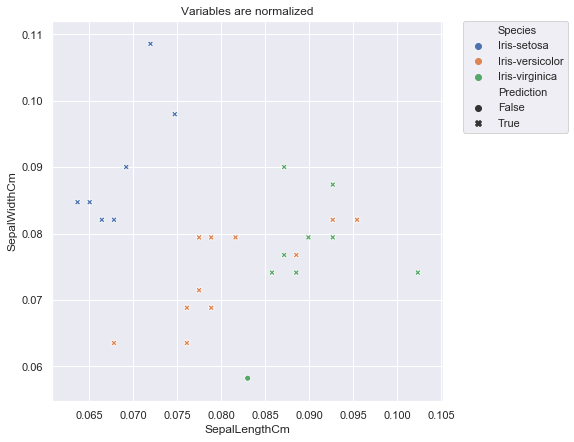

In [19]:
sns.set(font_scale=1)
f, ax = plt.subplots(figsize=(7, 7))
plt.title('Variables are normalized')
sns.scatterplot(test.SepalLengthCm, test.SepalWidthCm, hue=test.Species, style=test.Prediction, legend='full' )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# Other algorithms
Random forest